# 1. **Develop solution:**  Credit Fraud Detection for financial business

## 1.1. Introduction

In this part of the series, we will train an Machine learning or Deep learning based model (implemented in Keras) in for Anomaly Detection in credit card transaction data. The trained model will be evaluated on pre-labeled and anonymized dataset.

Ready? Let's go!

## 1.2.  Install the modeling requirements and libraries

First, we'll need to **install some libraries** that are not part of our container image. Normally, **Red Hat OpenShift Data Science** is already taking care of this for you, based on what it detects in the code. **Red Hat OpenShift Data Science** will reinstall all those libraries for you every time you launch the notebook!

In case you're using this notebook in a different environment, or just to make sure everything is ready, you can run the following cell to install OpenCV (a library to work with images) and Keras (an abstraction layer over Tensorflow).

In [ ]:
%pip install -r requirements.txt

## 1.3.  Importing the needed libraries and packages
Of course, we'll need to import various packages. They are either built in the notebook image you are running, or have been installed in the previous step.

In [1]:
import os, sys; sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


from src.dataloading.read_dataset import readData
from src.features.data_preprocessing import preprocessData
from src.visualization.visualize import visualizeData
from src.modules.build_model import buildModel
from src.modules.train_model import  trainModel
from src.modules.predict_model import predictor
from src.hyper_parameters.hps import get_hyper_paras
from src.github_commands.git_utils import gitCommands



## 1.4. Initialize some hyper-parameters

In [2]:
dataPath,BATCH,EPOCHS,model_Type,model_Name, model_dir,refRepoName,sourceRepoName,refRepoDir,sourceRepoDir,scalerPicklePath = get_hyper_paras()
dataPath,BATCH,EPOCHS,model_Type,model_Name, model_dir,refRepoName,sourceRepoName,refRepoDir,sourceRepoDir,scalerPicklePath

('/opt/app-root/src/FSI-Fraud-Detection-Workshop/data/raw/creditcard.csv',
 64,
 100,
 'dl',
 'LogisticRegression',
 '/opt/app-root/src/FSI-Fraud-Detection-Inference/models/finalized_dl_model.h5',
 'FSI-Fraud-Detection-Inference',
 'FSI-Fraud-Detection-Workshop',
 '/opt/app-root/src/FSI-Fraud-Detection-Inference',
 '/opt/app-root/src/FSI-Fraud-Detection-Workshop',
 '/opt/app-root/src/FSI-Fraud-Detection-Inference/models/scaler.pkl')

## 1.5. Reading the  Dataset

The data set is available on Kaggle for download - https://www.kaggle.com/dalpozz/creditcardfraud

In [3]:
data = readData(dataPath).readDataFrame()
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.6.  Data Preprocessing

We need to resize the data to make them ready for feeing to our model

************************************************************
********************   data shape  ********************
************************************************************
(284807, 31)
************************************************************
********************   data null info   ********************
************************************************************
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
************************************************************
********************   data info   ********************
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entrie

<Figure size 432x288 with 0 Axes>

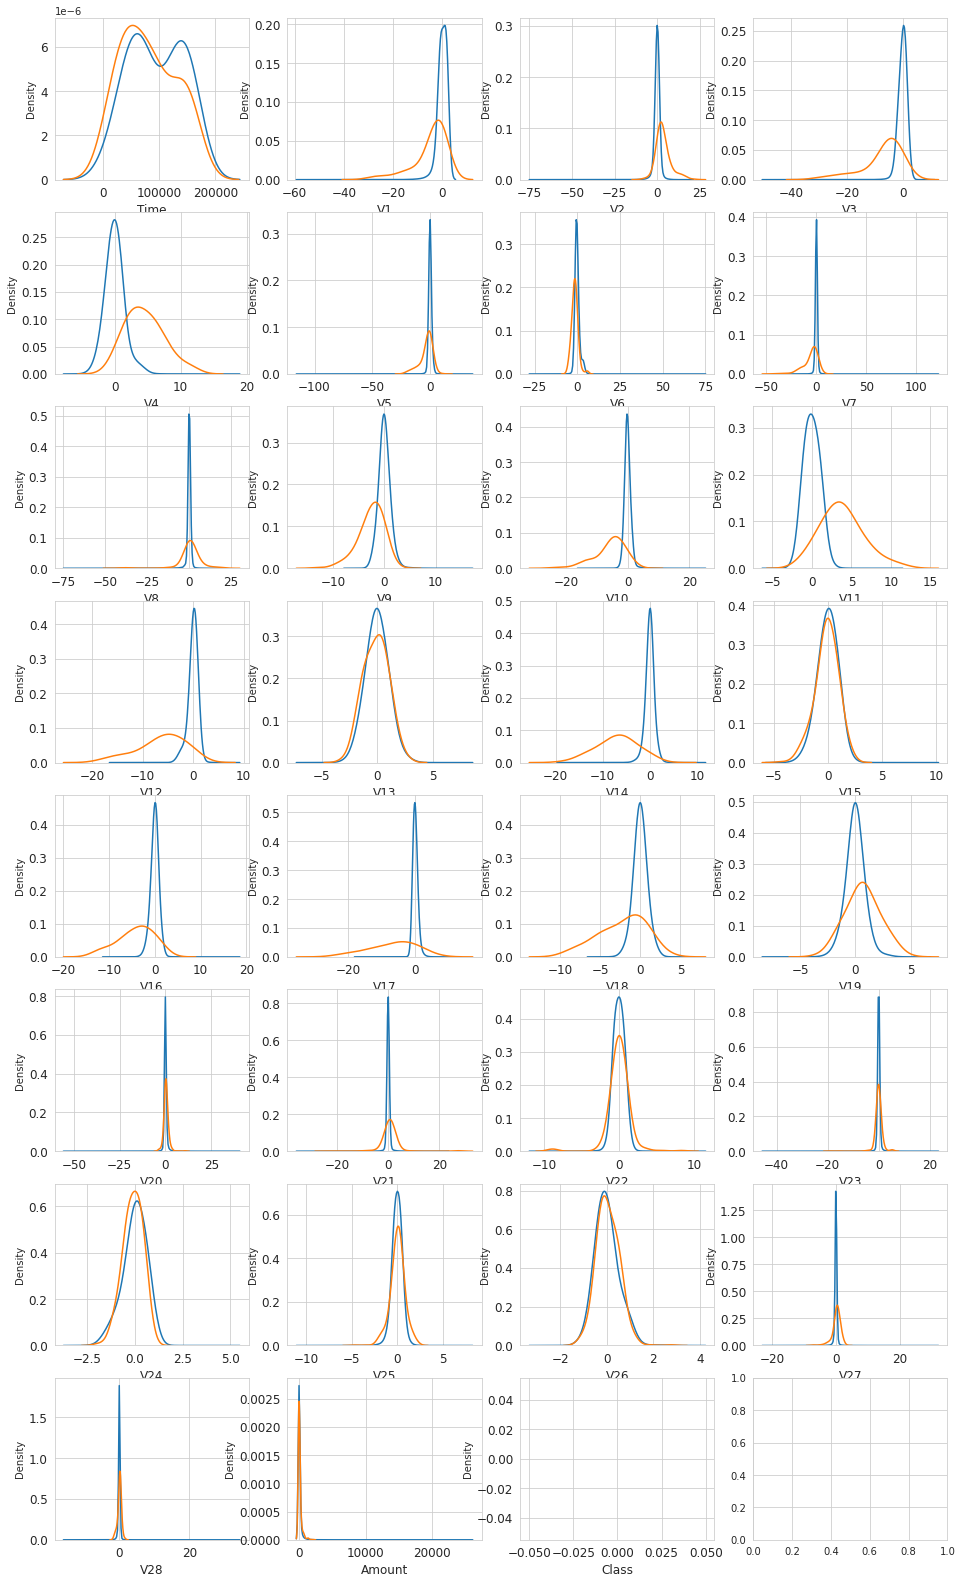

************************************************************
********************   Plot Correlation among data   ********************
************************************************************


In [ ]:
train_org, test, val, train = preprocessData(data,scalerPicklePath).dataPreProcessing()
train_org[1].shape, test[1].shape, val[1].shape, train[1].shape

## 1.7.  Design and compile the model 

In [ ]:
# clf = buildModel(train_data=train ).setupModel()
clf = buildModel(train_data=train,modelType = 'dl').setupModel()

## 1.8.  Training the Model

In [ ]:
# clf = trainModel(clf,train_data=train,savePath =model_dir ).modelTraining()
clf = trainModel(clf,train_data =train,val_data=val,modelType='dl',epochs=30,savePath=model_dir).modelTraining()

## 1.9.  Test Model based on validation data

In [ ]:
# predictor(clf = clf,data=test, modelType='ml').predict()
predictor(clf = clf,data=train, modelType='dl').predict()

## 1.10. Update the private git repo

In [ ]:
temp=time.localtime(time.time())
uploaddate= 'Update with the latest change ' + str(temp[0])+'_'+str(temp[1])+'_'+str(temp[2])+'_'+str(temp[3])+'_'+str(temp[4])

gitCommands(repo_dir = sourceRepoDir,repo_name = sourceRepoName,git_email= os.environ['GIT_EMAIL'], git_username = os.environ['GIT_USER_NAME'].lower(), git_token = os.environ['GIT_TOKEN'], commit_message = uploaddate, file_name = '.').gitPush()

__Thank you for your time!__

# 2. Deploy solution for Credit Fraud Detection 

## 2.1 Push the change to the inference repo 

In [ ]:
# gitCommands(repo_dir = repoDir,repo_name = repoName,git_email= email, git_username = username, git_token = token, commit_message = uploaddate, file_name = '.').gitPush()
gitCommands(repo_dir = refRepoDir,repo_name = refRepoName,git_email= os.environ['GIT_EMAIL'], git_username = os.environ['GIT_USER_NAME'].lower(), git_token = os.environ['GIT_TOKEN'], commit_message = uploaddate, file_name = '.').gitPush()

Now Just need to go to **Redhat Openshift Dedicated** to deploy the app :)